<a href="https://colab.research.google.com/github/JulianSKYOO/colab/blob/main/Copy_of_UNSW_DataSoc_PySpark_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PySpark Workshop 2022**

Created by UNSW DataSoc

## Installing PySpark

In [ ]:
!pip3 uninstall pyspark
!pip3 install pyspark==3.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 204.8 MB 39 kB/s 
     |████████████████████████████████| 198 kB 60.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.2-py2.py3-none-any.whl size=205186690 sha256=4908a51fbdd25818fa21d137089de5904b17621db35de92661446b39bae8a851
  Stored in directory: /root/.cache/pip/wheels/9a/39/f6/970565f38054a830e9a8593f388b36e14d75dba6c6fdafc1ec
Successfully built pyspark


## Neccessary Imports

In [ ]:
# Run these two lines to ensure that we have all the packaghes and classes to write PySpark code
import pyspark
from pyspark.sql import SparkSession
import pandas as pd

## Get Spark Up & Running

The entry point into all functionality in Spark is the SparkSession class. To create a basic SparkSession, just use SparkSession.builder:

In [ ]:
# Sets a name for the application, which will be shown in the Spark web UI.
# If no application name is set, a randomly generated name will be used.

spark = SparkSession.builder.appName('practice').getOrCreate()

In [ ]:
# Print this variable to the screen
# Tells us versions and ther name of the app (which we specified above)
spark

## Read in CSV file

We've got a csv file here, but often querying a database is how the data is gathered

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/UNSW-Data-Science-Society/Pyspark-Workshop/main/churn_data.csv")
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
2,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
3,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
4,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,771,France,Male,39,5,0.00,2,1,0,96270.64,-1
4996,516,France,Male,35,10,57369.61,1,1,1,101699.77,-1
4997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
4998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# Coverting the pandas dataframe to a spark dataframe so that we can use pyspark code
data = spark.createDataFrame(df)

In [ ]:
data.show(10)

+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        645|    Spain|  Male| 44|     8|113755.78|            2|        1|             0|      149756.71|     1|
|        376|  Germany|Female| 29|     4|115046.74|            4|        1|             0|      119346.88|     1|
|        653|  Germany|  Male| 58|     1|132602.88|            1|        1|             0|        5097.67|     1|
|        510|    Spain|Female| 38|     4|      0.0|            1|        1|             

In [ ]:
# Use ".printSchema()" to tell us the datatype of each column. Similar to data.info() or data.dtypes in pandas
data.printSchema()

root
 |-- CreditScore: long (nullable = true)
 |-- Geography: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: long (nullable = true)
 |-- Tenure: long (nullable = true)
 |-- Balance: double (nullable = true)
 |-- NumOfProducts: long (nullable = true)
 |-- HasCrCard: long (nullable = true)
 |-- IsActiveMember: long (nullable = true)
 |-- EstimatedSalary: double (nullable = true)
 |-- Exited: long (nullable = true)



## How does spark work??

A Spark dataframe is a distributed collection of data. This means that all processing does not happen in memory it happens accross a bunch of computers which we call a cluster.

In [ ]:
# What happens if you run this? Does it show the actual data?
data

DataFrame[CreditScore: bigint, Geography: string, Gender: string, Age: bigint, Tenure: bigint, Balance: double, NumOfProducts: bigint, HasCrCard: bigint, IsActiveMember: bigint, EstimatedSalary: double, Exited: bigint]

Try run this? Why does it show data this time? We call this lazy evaluation, meaning that Spark will only actually try and compute what you've asked it to at the very last moment. Hence, we use .show() to force spark to show us the data. In practice this could be expensive since the data is often stored among many computers!! [Here](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.show.html) is documentation for the `show` method

In [ ]:
data.show()

+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        645|    Spain|  Male| 44|     8|113755.78|            2|        1|             0|      149756.71|     1|
|        376|  Germany|Female| 29|     4|115046.74|            4|        1|             0|      119346.88|     1|
|        653|  Germany|  Male| 58|     1|132602.88|            1|        1|             0|        5097.67|     1|
|        510|    Spain|Female| 38|     4|      0.0|            1|        1|             

## Get Column Names

In [ ]:
data.columns

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

## Select Columns

Task: Select the <mark>Age</mark> and <mark>HasCrCard</mark> columns and show the first 5 rows of data. Do it in TWO different ways

[Documentation for selecting columns](https://sparkbyexamples.com/pyspark/select-columns-from-pyspark-dataframe/)

In [ ]:
# Method 1: Pass in column names as strings
data.select('Age', 'HasCrCard').show(n=10)  # n tells us the number of rows to select

# Passing in a list is fine too:
# cols = ['Age', 'HasCrCard']
# data.select(cols).show()

+---+---------+
|Age|HasCrCard|
+---+---------+
| 42|        1|
| 42|        1|
| 44|        1|
| 29|        1|
| 58|        1|
| 38|        1|
| 39|        1|
| 45|        1|
| 51|        0|
| 49|        0|
+---+---------+
only showing top 10 rows



In [ ]:
# Method 2: With the selectExpr method (allows us to alias column names easily)
data.selectExpr("Age", "HasCrCard as has_credit_card").show()

+---+---------------+
|Age|has_credit_card|
+---+---------------+
| 42|              1|
| 42|              1|
| 44|              1|
| 29|              1|
| 58|              1|
| 38|              1|
| 39|              1|
| 45|              1|
| 51|              0|
| 49|              0|
| 27|              1|
| 39|              1|
| 41|              0|
| 42|              1|
| 66|              1|
| 58|              1|
| 32|              1|
| 22|              1|
| 46|              1|
| 44|              1|
+---+---------------+
only showing top 20 rows



### Describe the dataset

In [ ]:
data.describe().show()

+-------+-----------------+---------+------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+------------------+
|summary|      CreditScore|Geography|Gender|               Age|            Tenure|           Balance|     NumOfProducts|          HasCrCard|     IsActiveMember|   EstimatedSalary|            Exited|
+-------+-----------------+---------+------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+------------------+
|  count|             5000|     5000|  5000|              5000|              5000|              5000|              5000|               5000|               5000|              5000|              5000|
|   mean|         649.4316|     null|  null|           40.4966|            5.0046| 80053.70446600008|            1.5168|             0.7044|             0.4792|100252.90096400009|           -0.1852|
| std

# Changing data types

Changing datatypes is important since we might want to perform arithmetic operations. This becomes problematic is numbers are being stored as strings, but this can be fixed.

In [ ]:
# The following imports help us eventually change datatypes
from pyspark.sql.types import DoubleType, IntegerType, DateType
from pyspark.sql.functions import col, udf

# Observe how the col() function is used here
# We are essentially saying...
# "With the column called `Age`, we wish to convert/cast the ages to integers"
# "...and with the column called `EstimatedSalary`, we wish to cast them to double (decimal/floating point numbers)"
# "We'll then store this in a variable called data (to overwrite our original data)"
data = data \
       .withColumn('Age', col('Age').cast(IntegerType())) \
       .withColumn('EstimatedSalary', col('EstimatedSalary').cast(DoubleType()))

data.show(n=10)

+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        645|    Spain|  Male| 44|     8|113755.78|            2|        1|             0|      149756.71|     1|
|        376|  Germany|Female| 29|     4|115046.74|            4|        1|             0|      119346.88|     1|
|        653|  Germany|  Male| 58|     1|132602.88|            1|        1|             0|        5097.67|     1|
|        510|    Spain|Female| 38|     4|      0.0|            1|        1|             

In [ ]:
# We see that the data types have been changed
data.printSchema()

root
 |-- CreditScore: long (nullable = true)
 |-- Geography: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tenure: long (nullable = true)
 |-- Balance: double (nullable = true)
 |-- NumOfProducts: long (nullable = true)
 |-- HasCrCard: long (nullable = true)
 |-- IsActiveMember: long (nullable = true)
 |-- EstimatedSalary: double (nullable = true)
 |-- Exited: long (nullable = true)



### Creating a column

Create a column, <b>est_salary_next_year</b> that takes our original column and adds 10 percent

In [ ]:
# Observe how for the `colName` argument we pass in the column name as a string
# ...and for the `col` argument (what we want the new column to look like), we use dot notation
data = data.withColumn(colName='est_salary_next_year', col=data.EstimatedSalary * 1.1)
data.show()

+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+--------------------+
|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|est_salary_next_year|
+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+--------------------+
|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|  111483.76800000001|
|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|  125324.72700000001|
|        645|    Spain|  Male| 44|     8|113755.78|            2|        1|             0|      149756.71|     1|          164732.381|
|        376|  Germany|Female| 29|     4|115046.74|            4|        1|             0|      119346.88|     1|  131281.56800000003|
|        653|  Germany|  Male| 58|     1|132602.88|    

With the `udf` (user defined function) import seen above, we can also write custom functions and apply this to a particular column. [Documentation here](https://sparkbyexamples.com/pyspark/pyspark-udf-user-defined-function/)

In [ ]:
def age_conversion(value):
    if value < 35:
        return 'Apply 10% discount'
    elif value < 50:
        return 'Apply 5% discount'
    else:
        return 'Apply 1% discount'

In [ ]:
# Applying our custom function

from pyspark.sql.types import StringType

# We want to store the transformation process in a variable to that we can apply it to a column
# Note how we explicitly define what data type we want the column to be (StringType)
transformation = udf(lambda val: age_conversion(val), StringType())

data = data.withColumn(colName='Age_discounts', col=transformation(col('Age')))
data.show()

+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+--------------------+------------------+
|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|est_salary_next_year|     Age_discounts|
+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+--------------------+------------------+
|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|  111483.76800000001| Apply 5% discount|
|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|  125324.72700000001| Apply 5% discount|
|        645|    Spain|  Male| 44|     8|113755.78|            2|        1|             0|      149756.71|     1|          164732.381| Apply 5% discount|
|        376|  Germany|Female| 29|     4|115046.74|            4|        1| 

### Rename a column
[Documentation for withColumnRenamed here](https://sparkbyexamples.com/pyspark/pyspark-rename-dataframe-column/)

In [ ]:
data = data.withColumnRenamed(existing='HasCrCard', new='has_credit_card')
data.show(n=2)

+-----------+---------+------+---+------+--------+-------------+---------------+--------------+---------------+------+--------------------+-----------------+
|CreditScore|Geography|Gender|Age|Tenure| Balance|NumOfProducts|has_credit_card|IsActiveMember|EstimatedSalary|Exited|est_salary_next_year|    Age_discounts|
+-----------+---------+------+---+------+--------+-------------+---------------+--------------+---------------+------+--------------------+-----------------+
|        619|   France|Female| 42|     2|     0.0|            1|              1|             1|      101348.88|     1|  111483.76800000001|Apply 5% discount|
|        502|   France|Female| 42|     8|159660.8|            3|              1|             0|      113931.57|     1|  125324.72700000001|Apply 5% discount|
+-----------+---------+------+---+------+--------+-------------+---------------+--------------+---------------+------+--------------------+-----------------+
only showing top 2 rows



In [ ]:
data.select(col("Gender").alias("sex")).show()

+------+
|   sex|
+------+
|Female|
|Female|
|  Male|
|Female|
|  Male|
|Female|
|Female|
|Female|
|Female|
|Female|
|Female|
|Female|
|  Male|
|  Male|
|Female|
|  Male|
|Female|
|  Male|
|Female|
|Female|
+------+
only showing top 20 rows



In [ ]:
data.selectExpr("Gender as sex")

DataFrame[sex: string]

# Filter rows

Let's filter some rows in 3 different ways

[See docs for more](https://sparkbyexamples.com/pyspark/pyspark-where-filter/)


In [ ]:
# Gets all rows that match `Female`
data.filter(data.Gender == "Female").show()

+-----------+---------+------+---+------+---------+-------------+---------------+--------------+---------------+------+--------------------+------------------+
|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|has_credit_card|IsActiveMember|EstimatedSalary|Exited|est_salary_next_year|     Age_discounts|
+-----------+---------+------+---+------+---------+-------------+---------------+--------------+---------------+------+--------------------+------------------+
|        619|   France|Female| 42|     2|      0.0|            1|              1|             1|      101348.88|     1|  111483.76800000001| Apply 5% discount|
|        502|   France|Female| 42|     8| 159660.8|            3|              1|             0|      113931.57|     1|  125324.72700000001| Apply 5% discount|
|        376|  Germany|Female| 29|     4|115046.74|            4|              1|             0|      119346.88|     1|  131281.56800000003|Apply 10% discount|
|        510|    Spain|Female| 38|     4

In [ ]:
# We can use `filter()` and `where()` interchangably
data.where(data.EstimatedSalary <= 500).show()

# Parsing SQL expression as a string also works
data.where("EstimatedSalary <= 500").show()

+-----------+---------+------+---+------+---------+-------------+---------------+--------------+---------------+------+--------------------+------------------+
|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|has_credit_card|IsActiveMember|EstimatedSalary|Exited|est_salary_next_year|     Age_discounts|
+-----------+---------+------+---+------+---------+-------------+---------------+--------------+---------------+------+--------------------+------------------+
|        556|    Spain|  Male| 38|     8|      0.0|            2|              0|             0|         417.41|     1|  459.15100000000007| Apply 5% discount|
|        616|  Germany|Female| 41|     1|103560.57|            1|              1|             0|         236.45|     1|             260.095| Apply 5% discount|
|        709|  Germany|  Male| 45|     4|122917.71|            1|              1|             1|          11.58|     1|  12.738000000000001| Apply 5% discount|
|        751|    Spain|Female| 34|     8

In [ ]:
# Finally, we can also filter columns in the same way as Pandas
# Note that each condition needs to be in parentheses
# REMEMBER TO USE `&` AND NOT `and`
# REMEMBER TO USE `|` AND NOT `or`
data[ ((data.Age == 40) & (data.Gender == 'Male')) | (data.Geography == 'Spain')].show()

+-----------+---------+------+---+------+---------+-------------+---------------+--------------+---------------+------+--------------------+------------------+
|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|has_credit_card|IsActiveMember|EstimatedSalary|Exited|est_salary_next_year|     Age_discounts|
+-----------+---------+------+---+------+---------+-------------+---------------+--------------+---------------+------+--------------------+------------------+
|        645|    Spain|  Male| 44|     8|113755.78|            2|              1|             0|      149756.71|     1|          164732.381| Apply 5% discount|
|        510|    Spain|Female| 38|     4|      0.0|            1|              1|             0|      118913.53|     1|  130804.88300000002| Apply 5% discount|
|        591|    Spain|Female| 39|     3|      0.0|            3|              1|             0|      140469.38|     1|  154516.31800000003| Apply 5% discount|
|        511|    Spain|Female| 66|     4

In [ ]:
# It's also important to be aware of any null values in you dataset
# In Pyspark we can import the functions module and use the `isnan` function to find any NaNs
from pyspark.sql import functions as F

data.filter(F.isnan("EstimatedSalary")).show()

+-----------+---------+------+---+------+-------+-------------+---------------+--------------+---------------+------+--------------------+-------------+
|CreditScore|Geography|Gender|Age|Tenure|Balance|NumOfProducts|has_credit_card|IsActiveMember|EstimatedSalary|Exited|est_salary_next_year|Age_discounts|
+-----------+---------+------+---+------+-------+-------------+---------------+--------------+---------------+------+--------------------+-------------+
+-----------+---------+------+---+------+-------+-------------+---------------+--------------+---------------+------+--------------------+-------------+



In [ ]:
# Suppose we want to filter out all active female members who are older than 65
# We can do this easily by breaking down each condition

c1 = (data.IsActiveMember == 1)   # Active member
c2 = (data.Gender == 'Female')    # Female
c3 = (data.Age >= 65)             # Older than 65 (inclusive)

data.filter((c1) & (c2) & (c3)).show()

+-----------+---------+------+---+------+---------+-------------+---------------+--------------+---------------+------+--------------------+-----------------+
|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|has_credit_card|IsActiveMember|EstimatedSalary|Exited|est_salary_next_year|    Age_discounts|
+-----------+---------+------+---+------+---------+-------------+---------------+--------------+---------------+------+--------------------+-----------------+
|        670|    Spain|Female| 65|     1|      0.0|            1|              1|             1|      177655.68|     1|  195421.24800000002|Apply 1% discount|
|        732|    Spain|Female| 69|     9|137453.43|            1|              0|             1|      110932.24|     1|  122025.46400000002|Apply 1% discount|
|        546|  Germany|Female| 74|     8|114888.74|            2|              1|             1|       66732.63|     1|   73405.89300000001|Apply 1% discount|
|        491|  Germany|Female| 68|     1| 9503

In [ ]:
# Suppose we want to sort the table by credit score and then by balance
# We can do this using the `sort()` function (by default, set to ascending)
data.sort(data.CreditScore, data.Balance).show()

# However, we can also sort by descending using `desc()`
data.sort(data.CreditScore.desc(), data.Balance.desc()).show()

# We can sort by ascending AND descending in different columns as well
data.sort(data.CreditScore.asc(), data.Balance.desc()).show()

+-----------+---------+------+---+------+---------+-------------+---------------+--------------+---------------+------+--------------------+------------------+
|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|has_credit_card|IsActiveMember|EstimatedSalary|Exited|est_salary_next_year|     Age_discounts|
+-----------+---------+------+---+------+---------+-------------+---------------+--------------+---------------+------+--------------------+------------------+
|        350|   France|Female| 60|     3|      0.0|            1|              0|             0|      113796.15|     1|          125175.765| Apply 1% discount|
|        350|   France|  Male| 51|    10|      0.0|            1|              1|             1|      125823.79|     1|          138406.169| Apply 1% discount|
|        350|  Germany|  Male| 39|     0| 109733.2|            2|              0|             0|      123602.11|     1|  135962.32100000003| Apply 5% discount|
|        350|   France|Female| 40|     0

In [ ]:
# Now, suppose we are interested in filtering the data to view all active
# female members who are older than 65 and then sorting amongst them to find
# the member with the highest credit score and the lowest balance

data.filter((c1) & (c2) & (c3)) \
.sort(data.CreditScore.desc(), data.Balance.asc()) \
.show()

+-----------+---------+------+---+------+---------+-------------+---------------+--------------+---------------+------+--------------------+-----------------+
|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|has_credit_card|IsActiveMember|EstimatedSalary|Exited|est_salary_next_year|    Age_discounts|
+-----------+---------+------+---+------+---------+-------------+---------------+--------------+---------------+------+--------------------+-----------------+
|        850|   France|Female| 81|     1|      0.0|            2|              1|             1|       59568.24|    -1|  65525.064000000006|Apply 1% discount|
|        850|   France|Female| 71|     4|      0.0|            2|              1|             1|      107236.87|    -1|          117960.557|Apply 1% discount|
|        850|  Germany|Female| 66|     0|127120.62|            1|              0|             1|      118929.64|     1|          130822.604|Apply 1% discount|
|        818|  Germany|Female| 72|     8|13529

# Groupbys and functions

Similar to sql, Pyspark provides a way to run aggregation functions on groups of your data e.g. Geography or Gender.

[Check out the groupby documentation for more!](https://sparkbyexamples.com/pyspark/pyspark-groupby-explained-with-example/)

In [ ]:
from pyspark.sql import functions as F

data.show()

+-----------+---------+------+---+------+---------+-------------+---------------+--------------+---------------+------+--------------------+------------------+
|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|has_credit_card|IsActiveMember|EstimatedSalary|Exited|est_salary_next_year|     Age_discounts|
+-----------+---------+------+---+------+---------+-------------+---------------+--------------+---------------+------+--------------------+------------------+
|        619|   France|Female| 42|     2|      0.0|            1|              1|             1|      101348.88|     1|  111483.76800000001| Apply 5% discount|
|        502|   France|Female| 42|     8| 159660.8|            3|              1|             0|      113931.57|     1|  125324.72700000001| Apply 5% discount|
|        645|    Spain|  Male| 44|     8|113755.78|            2|              1|             0|      149756.71|     1|          164732.381| Apply 5% discount|
|        376|  Germany|Female| 29|     4

In [ ]:
data.groupby("Gender").mean("est_salary_next_year").show()

+------+-------------------------+
|Gender|avg(est_salary_next_year)|
+------+-------------------------+
|Female|       110871.26678407664|
|  Male|       109731.17504306036|
+------+-------------------------+



In [ ]:
data.groupby("Geography").sum("NumOfProducts").show()

+---------+------------------+
|Geography|sum(NumOfProducts)|
+---------+------------------+
|  Germany|              2150|
|   France|              3648|
|    Spain|              1786|
+---------+------------------+



In [ ]:
# But how do you run multiple groupbys at the same time...
data.groupby("Geography") \
    .agg(F.sum("NumOfProducts").alias("NumOfProducts_summed"),
         F.avg("NumOfProducts").alias("Avgerge_NumOfProducts"),
         F.avg("EstimatedSalary").alias("Max_EstimatedSalary")) \
    .show()

+---------+--------------------+---------------------+-------------------+
|Geography|NumOfProducts_summed|Avgerge_NumOfProducts|Max_EstimatedSalary|
+---------+--------------------+---------------------+-------------------+
|  Germany|                2150|   1.4920194309507286|  98745.84448993752|
|   France|                3648|   1.5238095238095237| 100638.02375104427|
|    Spain|                1786|   1.5330472103004291| 101325.59145922742|
+---------+--------------------+---------------------+-------------------+



# Joins
[See the docs for more!](https://sparkbyexamples.com/pyspark/pyspark-join-explained-with-examples/)

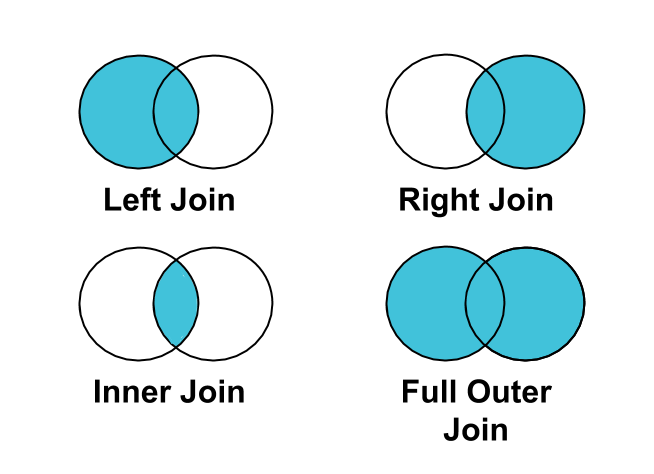

In [ ]:
#@title Venn Diagram of Join types {display-mode: "form"}
from IPython.display import Image
Image("https://docs.trifacta.com/download/attachments/160412683/JoinVennDiagram.png")

In [ ]:
movies = spark.createDataFrame(pd.read_csv("https://github.com/UNSW-Data-Science-Society/Pyspark-Workshop/raw/main/movies.csv"))
movies.show()

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|  Adventure|Children|
|      9| Sudden Death (1995)|              Action|
|     10|    GoldenEye (1995)|Action|Adventure|...|
|     11|American Presiden...|Comedy|Drama|Romance|
|     12|Dracula: Dead and...|       Comedy|Horror|
|     13|        Balto (1995)|Adventure|Animati...|
|     14|        Nixon (1995)|               Drama|
|     15|Cutthroat Island ...|Action|Adventure|...|
|     16|       Casino (1995)|         Crime|Drama|
|     17|Sen

In [ ]:
ratings = spark.createDataFrame(pd.read_csv("https://github.com/UNSW-Data-Science-Society/Pyspark-Workshop/raw/main/ratings.csv"))
ratings.show()

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|     16|   4.0|1217897793|
|     1|     24|   1.5|1217895807|
|     1|     32|   4.0|1217896246|
|     1|     47|   4.0|1217896556|
|     1|     50|   4.0|1217896523|
|     1|    110|   4.0|1217896150|
|     1|    150|   3.0|1217895940|
|     1|    161|   4.0|1217897864|
|     1|    165|   3.0|1217897135|
|     1|    204|   0.5|1217895786|
|     1|    223|   4.0|1217897795|
|     1|    256|   0.5|1217895764|
|     1|    260|   4.5|1217895864|
|     1|    261|   1.5|1217895750|
|     1|    277|   0.5|1217895772|
|     1|    296|   4.0|1217896125|
|     1|    318|   4.0|1217895860|
|     1|    349|   4.5|1217897058|
|     1|    356|   3.0|1217896231|
|     1|    377|   2.5|1217896373|
+------+-------+------+----------+
only showing top 20 rows



In [ ]:
# Joining in Pyspark is easy!
# All we have to do is specify the primary key to join on and the method to join!
movies_and_ratings = movies.join(ratings, on="movieId", how="left")
movies_and_ratings.show()

+-------+--------------------+--------------------+------+------+----------+
|movieId|               title|              genres|userId|rating| timestamp|
+-------+--------------------+--------------------+------+------+----------+
|     26|      Othello (1995)|               Drama|    47|   3.0| 853695250|
|     26|      Othello (1995)|               Drama|   165|   4.0| 862302232|
|     26|      Othello (1995)|               Drama|   220|   4.0|1112608851|
|     26|      Othello (1995)|               Drama|   226|   4.0| 857755685|
|     26|      Othello (1995)|               Drama|   307|   3.0| 831901363|
|     26|      Othello (1995)|               Drama|   310|   4.0|1092228014|
|     26|      Othello (1995)|               Drama|   311|   4.0| 850408346|
|     26|      Othello (1995)|               Drama|   331|   4.0|1138987110|
|     26|      Othello (1995)|               Drama|   354|   3.0|1017759082|
|     26|      Othello (1995)|               Drama|   422|   3.5|1071634326|

In [ ]:
movies_and_ratings.count()

105343

In [ ]:
# Do any movies have any missing ratings?
movies_and_ratings.filter(F.isnan("rating")).show()

+-------+-----+------+------+------+---------+
|movieId|title|genres|userId|rating|timestamp|
+-------+-----+------+------+------+---------+
+-------+-----+------+------+------+---------+




# Temp views and spark.sql

`createOrReplaceTempView` creates (or replaces if that view name already exists) a lazily evaluated "view" that you can then use like a sql table in Spark SQL. It does not persist to memory unless you cache the dataset that underpins the view.


In [ ]:
spark.catalog.listTables()

In [ ]:
# Allows us to nickname our table so that we can reference it later using SQL style code
dataset_name = data.createOrReplaceTempView("mytable")

In [ ]:
spark.catalog.listTables()

[Table(name='mytable', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]

In [ ]:
spark.sql('SELECT * FROM mytable').show(10)

+-----------+---------+------+---+------+---------+-------------+---------------+--------------+---------------+------+--------------------+------------------+
|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|has_credit_card|IsActiveMember|EstimatedSalary|Exited|est_salary_next_year|     Age_discounts|
+-----------+---------+------+---+------+---------+-------------+---------------+--------------+---------------+------+--------------------+------------------+
|        619|   France|Female| 42|     2|      0.0|            1|              1|             1|      101348.88|     1|  111483.76800000001| Apply 5% discount|
|        502|   France|Female| 42|     8| 159660.8|            3|              1|             0|      113931.57|     1|  125324.72700000001| Apply 5% discount|
|        645|    Spain|  Male| 44|     8|113755.78|            2|              1|             0|      149756.71|     1|          164732.381| Apply 5% discount|
|        376|  Germany|Female| 29|     4

In [ ]:
spark.sql('SELECT Geography, Gender, Age FROM mytable').show(10)

+---------+------+---+
|Geography|Gender|Age|
+---------+------+---+
|   France|Female| 42|
|   France|Female| 42|
|    Spain|  Male| 44|
|  Germany|Female| 29|
|  Germany|  Male| 58|
|    Spain|Female| 38|
|    Spain|Female| 39|
|   France|Female| 45|
|   France|Female| 51|
|   France|Female| 49|
+---------+------+---+
only showing top 10 rows



# Advanced Pyspark concepts


## Caching and Persistence

[See the docs for more!](https://sparkbyexamples.com/spark/spark-dataframe-cache-and-persist-explained/)

Caching is a technique to optimise queries. It's super helpful when you plan on reusing the same query over and over again...

Let's see how it's used below:

In [ ]:
%%time
data.count()

CPU times: user 1.06 ms, sys: 4 µs, total: 1.06 ms
Wall time: 166 ms


5000

In [ ]:
%%time
data.cache().count()

CPU times: user 14.2 ms, sys: 1.17 ms, total: 15.3 ms
Wall time: 741 ms


5000

In [ ]:
%%time
data.count()

CPU times: user 4.18 ms, sys: 10 µs, total: 4.19 ms
Wall time: 80.9 ms


5000

### Persistence Vs Caching

Persistence is very similar to caching with the major difference being that when you cache a result it gets saved to `MEMORY_AND_DISK` whilst with persistence you can save it to some other storage level such as `DISK_ONLY`.

### Extra facts

Caching and persistence is fault tolerant meaning that if a partition is lost it gets automatically recomputed!!

## Explain Plans & Pyspark under the hood

Pyspark provides a really useful and high level api but what happens if we want to look under the hood and see how Pyspark is actually evaluting our sql...

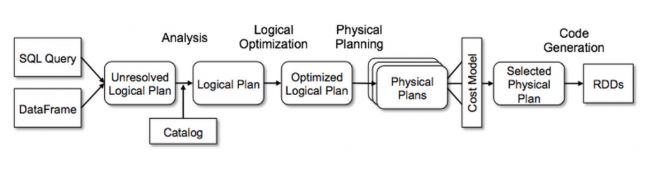

In [ ]:
#@title [Bonus] How does spark work under the hood?? {display-mode: "form"}
from IPython.display import Image
Image("https://i0.wp.com/blog.knoldus.com/wp-content/uploads/2019/11/Fig-1-Plan-1.jpg")

In [ ]:
movies_and_ratings.explain(True)

== Parsed Logical Plan ==
'Join UsingJoin(LeftOuter,Buffer(movieId))
:- LogicalRDD [movieId#1782L, title#1783, genres#1784], false
+- LogicalRDD [userId#1801L, movieId#1802L, rating#1803, timestamp#1804L], false

== Analyzed Logical Plan ==
movieId: bigint, title: string, genres: string, userId: bigint, rating: double, timestamp: bigint
Project [movieId#1782L, title#1783, genres#1784, userId#1801L, rating#1803, timestamp#1804L]
+- Join LeftOuter, (movieId#1782L = movieId#1802L)
   :- LogicalRDD [movieId#1782L, title#1783, genres#1784], false
   +- LogicalRDD [userId#1801L, movieId#1802L, rating#1803, timestamp#1804L], false

== Optimized Logical Plan ==
Project [movieId#1782L, title#1783, genres#1784, userId#1801L, rating#1803, timestamp#1804L]
+- Join LeftOuter, (movieId#1782L = movieId#1802L)
   :- LogicalRDD [movieId#1782L, title#1783, genres#1784], false
   +- Filter isnotnull(movieId#1802L)
      +- LogicalRDD [userId#1801L, movieId#1802L, rating#1803, timestamp#1804L], false

== 